In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
import glob
import sys
import os

In [54]:
datasets_list=['01_2013-2014_-_2017-_2018_Demographic_Snapshot_Citywide.csv','03_2013_-_2018_Demographic_Snapshot_Borough.csv']
attributes_list=['Total Enrollment','% Asian']
mydict1={}
for filename in glob.glob('*.csv'):
    if(filename in datasets_list):
        data=pd.read_csv(filename)
        for col in data.columns:
            #print (col)
             if col in attributes_list:
                    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
                    numerical_vars = list(data.select_dtypes(include=numerics).columns)
                    data = data[numerical_vars]
                    lab=[col]
                    #print(data[col])
                    # separate train and test sets
                    X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=lab, axis=1),data[col],test_size=0.1,random_state=0)
                    mi = mutual_info_regression(X_train.fillna(0), y_train)
                    mi = pd.Series(mi)
                    mi.index = X_train.columns
                    mi.sort_values(ascending=False)
                    mydict[col]=mi.to_dict()
        mydict1[filename]=mydict
mydict1

{'01_2013-2014_-_2017-_2018_Demographic_Snapshot_Citywide.csv': {'% Asian': {'Total Enrollment': 1.7249041593081844,
   'Grade PK (Half Day & Full Day)': 1.336051345455371,
   'Grade K': 1.6983890077930333,
   'Grade 1': 1.6794496138536392,
   'Grade 2': 1.7135405229445482,
   'Grade 3': 1.6983890077930333,
   'Grade 4': 1.6605102199142447,
   'Grade 5': 1.6946011290051544,
   'Grade 6': 1.671873856277882,
   'Grade 7': 1.7211162805203057,
   'Grade 8': 1.6756617350657608,
   'Grade 9': 1.387241821645847,
   'Grade 10': 1.4858348952389209,
   'Grade 11': 1.6567223411263665,
   'Grade 12': 1.6324799168839421,
   '# Female': 1.7286920380960633,
   '% Female': 1.1556384502697485,
   '# Male': 1.7249041593081844,
   '% Male': 1.1259847706160688,
   '# Asian': 1.6695470164510418,
   '# Black': 1.7286920380960633,
   '% Black': 1.6779344623384873,
   '# Hispanic': 1.6983890077930333,
   '% Hispanic': 1.3771227740267997,
   '# Multiple Race Categories Not Represented': 0.9555521729107437,
   

In [63]:
for datasets in mydict1:
    for attributes in mydict1[datasets]:
        print (datasets,"------------",attributes,"\n",mydict1[datasets][attributes])


01_2013-2014_-_2017-_2018_Demographic_Snapshot_Citywide.csv ------------ % Asian 
 {'Total Enrollment': 1.7249041593081844, 'Grade PK (Half Day & Full Day)': 1.336051345455371, 'Grade K': 1.6983890077930333, 'Grade 1': 1.6794496138536392, 'Grade 2': 1.7135405229445482, 'Grade 3': 1.6983890077930333, 'Grade 4': 1.6605102199142447, 'Grade 5': 1.6946011290051544, 'Grade 6': 1.671873856277882, 'Grade 7': 1.7211162805203057, 'Grade 8': 1.6756617350657608, 'Grade 9': 1.387241821645847, 'Grade 10': 1.4858348952389209, 'Grade 11': 1.6567223411263665, 'Grade 12': 1.6324799168839421, '# Female': 1.7286920380960633, '% Female': 1.1556384502697485, '# Male': 1.7249041593081844, '% Male': 1.1259847706160688, '# Asian': 1.6695470164510418, '# Black': 1.7286920380960633, '% Black': 1.6779344623384873, '# Hispanic': 1.6983890077930333, '% Hispanic': 1.3771227740267997, '# Multiple Race Categories Not Represented': 0.9555521729107437, '% Multiple Race Categories Not Represented': 0.2329167794865803, '#

In [64]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

# Female                                      1.728692
# Black                                       1.728692
Total Enrollment                              1.724904
# Male                                        1.724904
Grade 7                                       1.721116
Grade 2                                       1.713541
# Hispanic                                    1.698389
Grade K                                       1.698389
Grade 3                                       1.698389
Grade 5                                       1.694601
Grade 1                                       1.679450
% Black                                       1.677934
Grade 8                                       1.675662
Grade 6                                       1.671874
# Asian                                       1.669547
Grade 4                                       1.660510
Grade 11                                      1.656722
# White                                       1.636214
Grade 12  

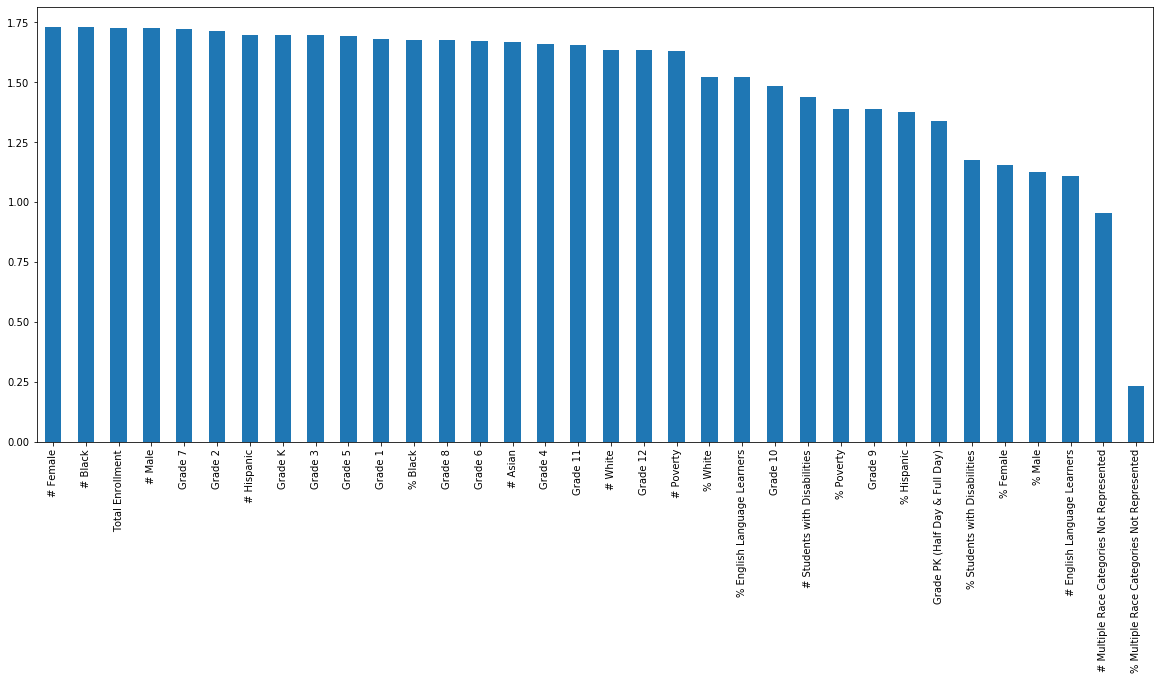

In [65]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [66]:
# here I will select the top 10 features
# which are shown below
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

ValueError: Unknown label type: 'continuous'

### Regression

In [67]:
# load dataset
data.shape

(25, 35)

In [68]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(25, 35)

In [69]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Dropped Out - n'], axis=1),
    data['Dropped Out - n'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

KeyError: "['Dropped Out - n'] not found in axis"

In [70]:
# determine the mutual information
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

# Black                                       1.728692
# Female                                      1.728692
Total Enrollment                              1.724904
# Male                                        1.724904
Grade 7                                       1.721116
Grade 2                                       1.713541
# Hispanic                                    1.698389
Grade K                                       1.698389
Grade 3                                       1.698389
Grade 5                                       1.694601
Grade 1                                       1.679450
% Black                                       1.677934
Grade 8                                       1.675662
Grade 6                                       1.671874
# Asian                                       1.669547
Grade 4                                       1.660510
Grade 11                                      1.656722
# White                                       1.636214
Grade 12  

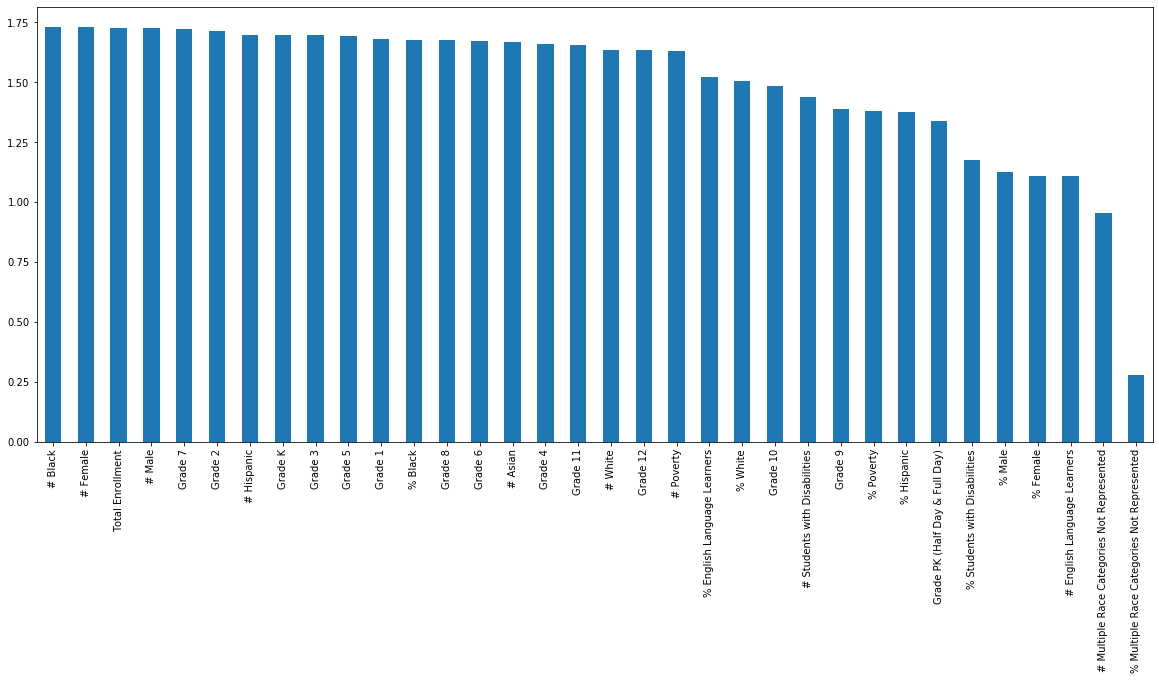

In [71]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [72]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['Total Enrollment', '# Female', '# Male', '# Black'], dtype='object')

I have not personally used mutual information in any of my projects. However, there is some value in the method. See for example:

Comparison between univariate and mutual information selection in [sklean website](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

In addition, mutual information has been widely covered, if anything else from a theoretical perspective, in several articles that I share in the additional reading resources section. Therefore I wanted to have it covered in the course, and I leave it up to you to explore it and see if you find any use in it.

That is all for this lecture, I hope you enjoyed it and see you in the next one!